#Upload data

In [ ]:
#! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
 ! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           8627        178  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           6761        143  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data      Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          14350        246  1.0              
rabieelkharoua/predict-online-course-engageme

In [ ]:
#!kaggle competitions download -c store-sales-time-series-forecasting -p /content/drive/MyDrive/Kaggle

In [ ]:
cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
!mkdir timeseries

mkdir: cannot create directory ‘timeseries’: File exists


In [ ]:
!pwd

/content/drive/MyDrive/Kaggle


In [ ]:
!ls

kaggle.json				     test_identity.csv
model.pkl				     test_transaction.csv
online-payments-fraud-detection-dataset.zip  timeseries
PS_20174392719_1491204439457_log.csv	     train_identity.csv
sample_submission.csv			     train_transaction.csv
store-sales-time-series-forecasting.zip


In [ ]:
!cd timeseries

In [ ]:
!pwd

/content/drive/MyDrive/Kaggle


In [ ]:
!cd /content/drive/MyDrive/Kaggle/timeseries

In [ ]:
#! unzip /content/drive/MyDrive/Kaggle/timeseries/store-sales-time-series-forecasting.zip

In [ ]:
!pwd

/content/drive/MyDrive/Kaggle


In [ ]:
cd /content/drive/MyDrive/Kaggle/timeseries/

/content/drive/MyDrive/Kaggle/timeseries


In [ ]:
!pwd

/content/drive/MyDrive/Kaggle/timeseries


In [ ]:
#! unzip /content/drive/MyDrive/Kaggle/timeseries/store-sales-time-series-forecasting.zip

In [ ]:
import pandas as pd
# for array computations and loading data
import numpy as np
import seaborn as sns
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf


# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

#Looking at data

In [ ]:
df_train=pd.read_csv('train.csv')
df_oil=pd.read_csv('oil.csv')
df_stores=pd.read_csv('stores.csv')
df_transactions=pd.read_csv('transactions.csv')
df_holidays=pd.read_csv('holidays_events.csv')

In [ ]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [ ]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [ ]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
df_train.isna().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
df_transactions.isna().sum()


date            0
store_nbr       0
transactions    0
dtype: int64

In [ ]:
df_stores.isna().sum()


store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
df_holidays.isna().sum()


date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [ ]:
df_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [ ]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
df_train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

#Old Implementation

In [ ]:
one_hot = pd.get_dummies(df_train['family'])
# Drop column B as it is now encoded
df_train = df_train.drop('family',axis = 1)
# Join the encoded df
df_train = df_train.join(one_hot)
df_train

,id,date,store_nbr,sales,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0,2013-01-01,1,0.000,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2013-01-01,1,0.000,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2013-01-01,1,0.000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2013-01-01,1,0.000,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2013-01-01,1,0.000,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,438.133,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3000884,3000884,2017-08-15,9,154.553,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3000885,3000885,2017-08-15,9,2419.729,148,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3000886,3000886,2017-08-15,9,121.000,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df_train['date'].nunique()

1684

In [ ]:
df_train['name_date']=df_train["date"].str[:4]
df_train["name_date"]

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
3000883    2017
3000884    2017
3000885    2017
3000886    2017
3000887    2017
Name: name_date, Length: 3000888, dtype: object

In [ ]:
df_train["name_date"].nunique()

5

In [ ]:
df_train['name_date_month']=df_train["date"].str[:8]
df_train["name_date_month"].nunique()

56

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 40 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   date                        object 
 2   store_nbr                   int64  
 3   sales                       float64
 4   onpromotion                 int64  
 5   AUTOMOTIVE                  bool   
 6   BABY CARE                   bool   
 7   BEAUTY                      bool   
 8   BEVERAGES                   bool   
 9   BOOKS                       bool   
 10  BREAD/BAKERY                bool   
 11  CELEBRATION                 bool   
 12  CLEANING                    bool   
 13  DAIRY                       bool   
 14  DELI                        bool   
 15  EGGS                        bool   
 16  FROZEN FOODS                bool   
 17  GROCERY I                   bool   
 18  GROCERY II                  bool   
 19  HARDWARE             

In [ ]:
df_train_mmyyyy=df_train
one_hot = pd.get_dummies(df_train_mmyyyy['name_date_month'])
# Drop column B as it is now encoded
df_train_mmyyyy = df_train_mmyyyy.drop('name_date_month',axis = 1)
df_train_mmyyyy = df_train_mmyyyy.join(one_hot)
df_train_mmyyyy

,id,date,store_nbr,sales,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,...,2016-11-,2016-12-,2017-01-,2017-02-,2017-03-,2017-04-,2017-05-,2017-06-,2017-07-,2017-08-
0,0,2013-01-01,1,0.000,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2013-01-01,1,0.000,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2013-01-01,1,0.000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2013-01-01,1,0.000,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2013-01-01,1,0.000,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,438.133,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3000884,3000884,2017-08-15,9,154.553,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3000885,3000885,2017-08-15,9,2419.729,148,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3000886,3000886,2017-08-15,9,121.000,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_train_mmyyyy=df_train_mmyyyy.drop(['date','name_date'],axis=1)
df_train_mmyyyy

,id,store_nbr,sales,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,...,2016-11-,2016-12-,2017-01-,2017-02-,2017-03-,2017-04-,2017-05-,2017-06-,2017-07-,2017-08-
0,0,1,0.000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,0.000,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1,0.000,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1,0.000,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1,0.000,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,9,438.133,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3000884,3000884,9,154.553,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3000885,3000885,9,2419.729,148,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3000886,3000886,9,121.000,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_train_mmyyyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 93 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   store_nbr                   int64  
 2   sales                       float64
 3   onpromotion                 int64  
 4   AUTOMOTIVE                  bool   
 5   BABY CARE                   bool   
 6   BEAUTY                      bool   
 7   BEVERAGES                   bool   
 8   BOOKS                       bool   
 9   BREAD/BAKERY                bool   
 10  CELEBRATION                 bool   
 11  CLEANING                    bool   
 12  DAIRY                       bool   
 13  DELI                        bool   
 14  EGGS                        bool   
 15  FROZEN FOODS                bool   
 16  GROCERY I                   bool   
 17  GROCERY II                  bool   
 18  HARDWARE                    bool   
 19  HOME AND KITCHEN I   

#Convert to datetime and implement trends

In [ ]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
df_train= pd.read_csv(
    'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_train.head()

<ipython-input-36-0fd727870e5d>:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_train= pd.read_csv(


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df_train = df_train.set_index('date').to_period('D')
df_train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000000,0
2013-01-01,1,1,BABY CARE,0.000000,0
2013-01-01,2,1,BEAUTY,0.000000,0
2013-01-01,3,1,BEVERAGES,0.000000,0
2013-01-01,4,1,BOOKS,0.000000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.132996,0
2017-08-15,3000884,9,PREPARED FOODS,154.552994,1
2017-08-15,3000885,9,PRODUCE,2419.729004,148


In [ ]:

average_sales=df_train
average_sales = average_sales.set_index(['store_nbr', 'family'], append=True)
#why is this necessary to implement next line???
average_sales = average_sales.groupby('date').sum()['sales']
average_sales

date
2013-01-01      2511.618896
2013-01-02    496092.406250
2013-01-03    361461.218750
2013-01-04    354459.687500
2013-01-05    477350.125000
                  ...      
2017-08-11    826373.750000
2017-08-12    792630.562500
2017-08-13    865639.687500
2017-08-14    760922.437500
2017-08-15    762661.937500
Freq: D, Name: sales, Length: 1684, dtype: float32

In [ ]:
average_sales["2013-01-01"]

2511.619

##Time-step

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

In [ ]:
average_sales = average_sales.to_frame()
#Important

In [ ]:
average_sales

,sales
date,
2013-01-01,2511.618896
2013-01-02,496092.406250
2013-01-03,361461.218750
2013-01-04,354459.687500
2013-01-05,477350.125000
...,...
2017-08-11,826373.750000
2017-08-12,792630.562500
2017-08-13,865639.687500


In [ ]:
b=np.arange(len(average_sales.index))
average_sales['Time']=b
average_sales

,sales,Time
date,,
2013-01-01,2511.618896,0
2013-01-02,496092.406250,1
2013-01-03,361461.218750,2
2013-01-04,354459.687500,3
2013-01-05,477350.125000,4
...,...,...
2017-08-11,826373.750000,1679
2017-08-12,792630.562500,1680
2017-08-13,865639.687500,1681


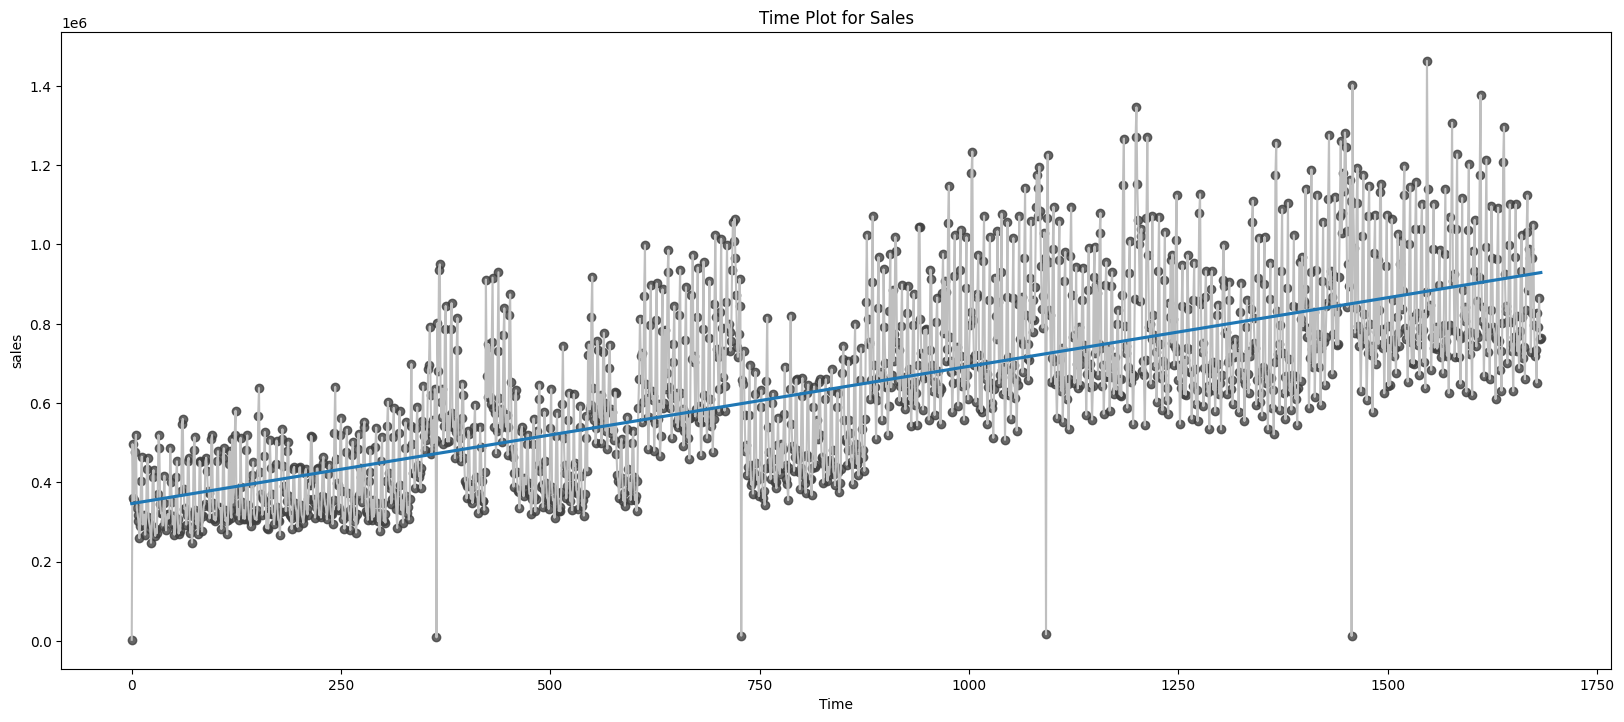

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
ax.plot('Time', 'sales', data=average_sales, color='0.75')
ax = sns.regplot(x='Time', y='sales', data=average_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot for Sales');

##Lag-feature

In [ ]:
average_sales['Lag_1'] = average_sales['sales'].shift(1)
average_sales

,sales,Time,Lag_1
date,,,
2013-01-01,2511.618896,0,NaN
2013-01-02,496092.406250,1,2511.618896
2013-01-03,361461.218750,2,496092.406250
2013-01-04,354459.687500,3,361461.218750
2013-01-05,477350.125000,4,354459.687500
...,...,...,...
2017-08-11,826373.750000,1679,651386.937500
2017-08-12,792630.562500,1680,826373.750000
2017-08-13,865639.687500,1681,792630.562500


In [ ]:
average_sales['Lag_1']= average_sales['Lag_1'].fillna(0)
average_sales

,sales,Time,Lag_1
date,,,
2013-01-01,2511.618896,0,0.000000
2013-01-02,496092.406250,1,2511.618896
2013-01-03,361461.218750,2,496092.406250
2013-01-04,354459.687500,3,361461.218750
2013-01-05,477350.125000,4,354459.687500
...,...,...,...
2017-08-11,826373.750000,1679,651386.937500
2017-08-12,792630.562500,1680,826373.750000
2017-08-13,865639.687500,1681,792630.562500


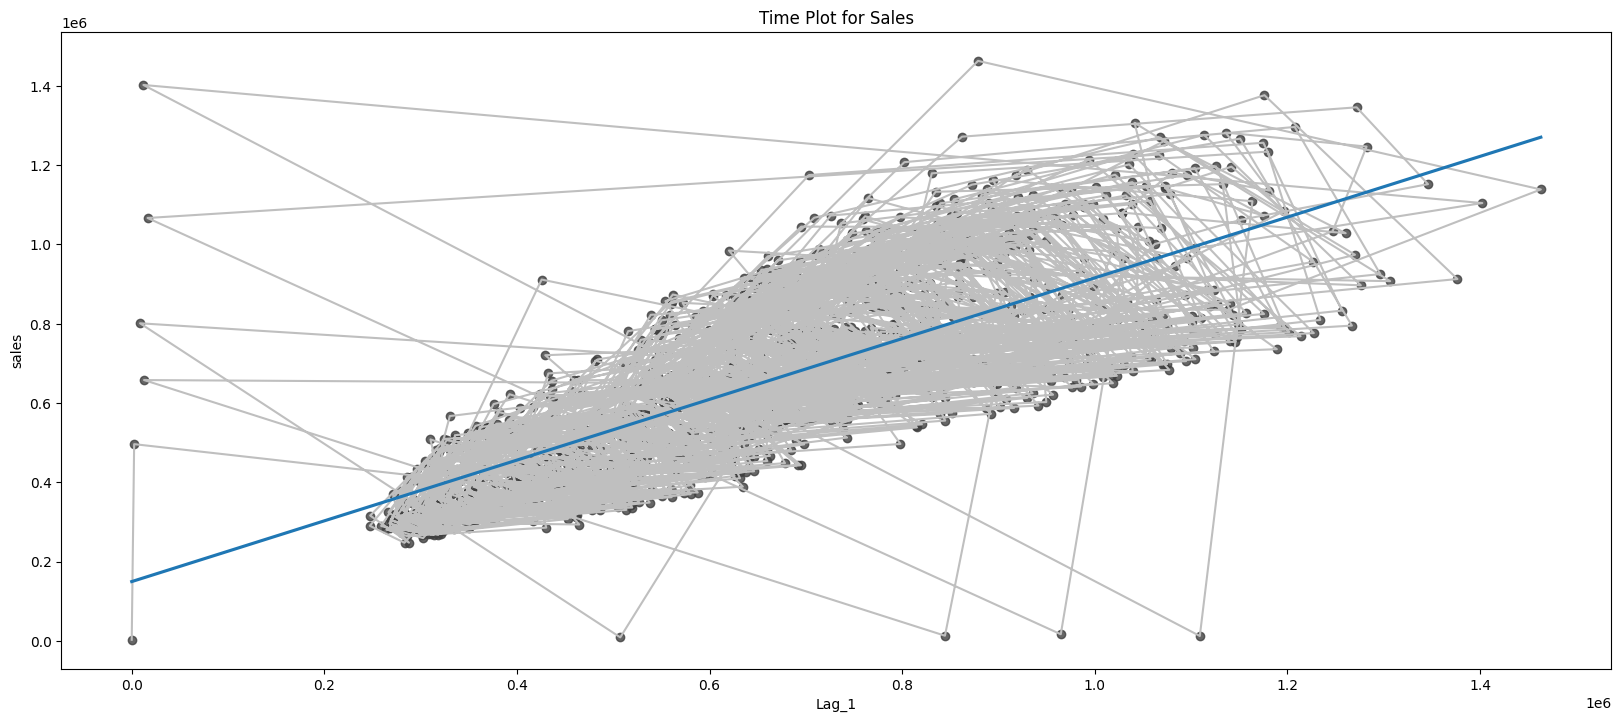

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
ax.plot('Lag_1', 'sales', data=average_sales, color='0.75')
ax = sns.regplot(x='Lag_1', y='sales', data=average_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot for Sales');

#Train

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

<ipython-input-49-8a3fe4303c9d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


##Time-step

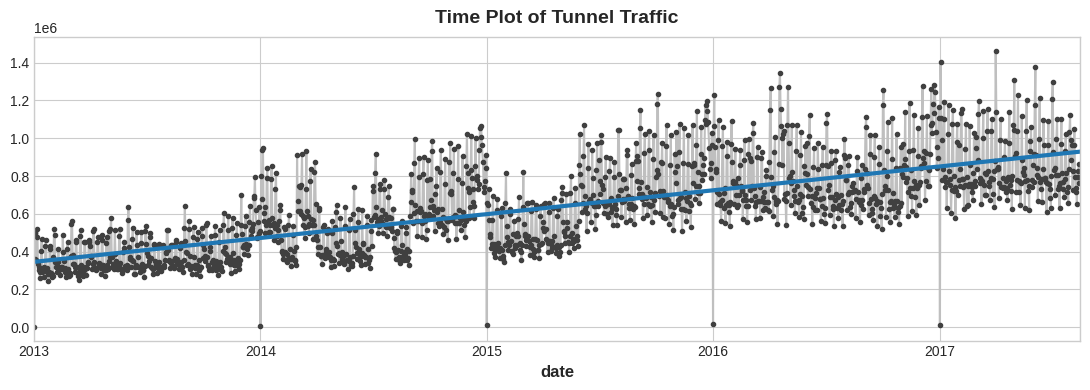

In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X_1 = average_sales.loc[:, ['Time']]  # features
y_1 = average_sales.loc[:, 'sales']  # target

# Train the model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred_1 = pd.Series(model_1.predict(X_1), index=X_1.index)
ax = y_1.plot(**plot_params)
ax = y_pred_1.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

##Lag

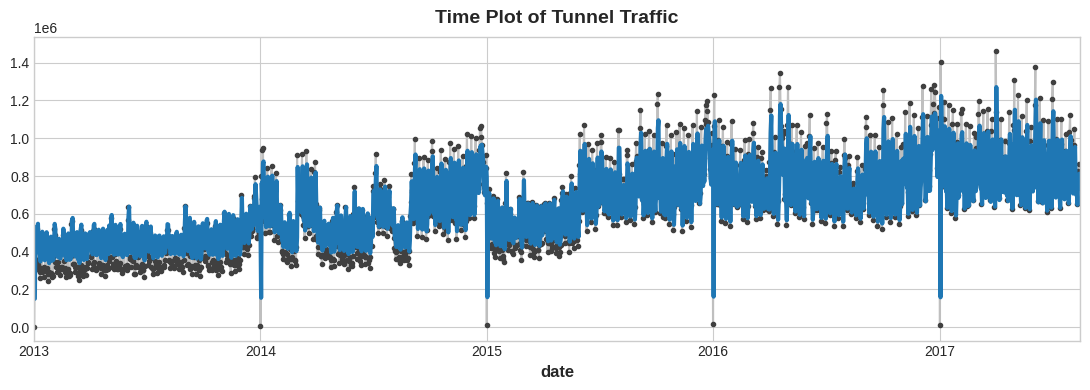

In [ ]:
from sklearn.linear_model import LinearRegression

X_2 = average_sales.loc[:, ['Lag_1']]
y_2 = average_sales.loc[:, 'sales']  # create the target
y_2, X_2 = y_2.align(X_2, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X_2, y_2)
y_pred_2=pd.Series(model.predict(X_2), index=X_2.index)
ax = y_2.plot(**plot_params)
ax = y_pred_2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

Fitting decent enough

#Trends (a fail)

<Axes: title={'center': 'Time Plot of sales'}, xlabel='date'>

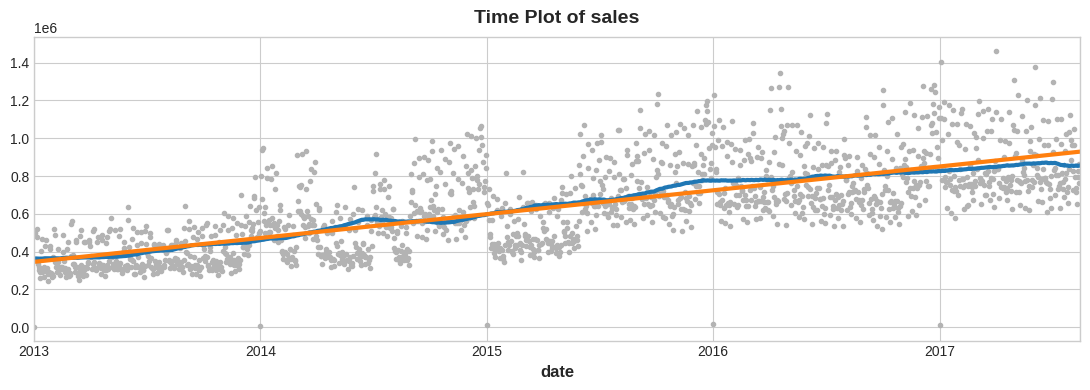

In [ ]:
moving_average = average_sales["sales"].rolling(
    window=400,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=200,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = average_sales["sales"].plot(style=".", color="0.7")
moving_average.plot(
    ax=ax, linewidth=3, title="Time Plot of sales", legend=False,
);
#Also plotting Prediction of time-step
y_pred_1.plot(ax=ax, linewidth=3)

Linear Regression model very close to moving mean

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=average_sales.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
X_fore = dp.out_of_sample(steps=30)
b=np.arange(len(X_fore.index))
X_fore['Time']=b
X_fore.head()
#y_fore_1 = pd.Series(model_1.predict(X_fore), index=X_fore.index)

#y_fore_1.head()

,const,trend,Time
2017-08-16,1.0,1685.0,0
2017-08-17,1.0,1686.0,1
2017-08-18,1.0,1687.0,2
2017-08-19,1.0,1688.0,3
2017-08-20,1.0,1689.0,4


In [ ]:
ax = average_sales["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred_1["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

#Seasonality

In [ ]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [ ]:
average_sales_ori=average_sales

###For year 2017

In [ ]:
average_sales=average_sales.loc['2017']
average_sales

,sales,Time,Lag_1
date,,,
2017-01-01,1.208250e+04,1457,1.109013e+06
2017-01-02,1.402306e+06,1458,1.208250e+04
2017-01-03,1.104377e+06,1459,1.402306e+06
2017-01-04,9.900934e+05,1460,1.104377e+06
2017-01-05,7.776209e+05,1461,9.900934e+05
...,...,...,...
2017-08-11,8.263738e+05,1679,6.513869e+05
2017-08-12,7.926306e+05,1680,8.263738e+05
2017-08-13,8.656397e+05,1681,7.926306e+05


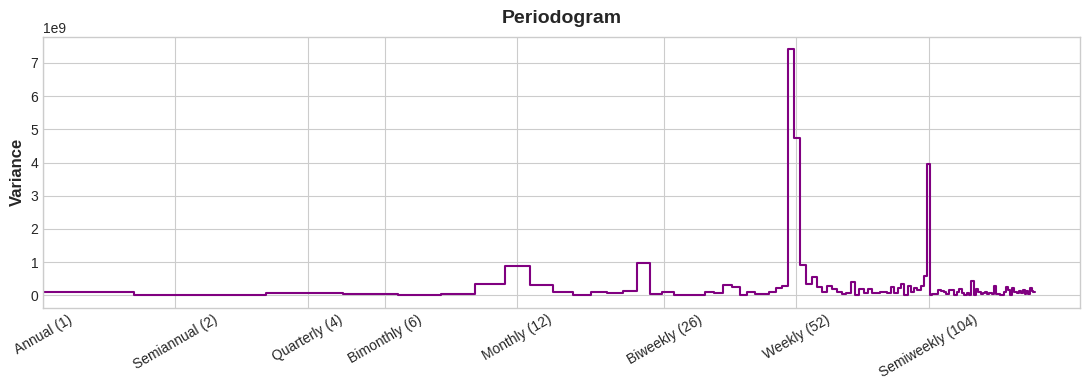

In [ ]:
plot_periodogram(average_sales.sales);

It's a weekly Periodism

<ipython-input-56-c0ef663fbe20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_seasonality["week"] = X_seasonality.index.week
<ipython-input-56-c0ef663fbe20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_seasonality["day"] = X_seasonality.index.dayofweek
<ipython-input-56-c0ef663fbe20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

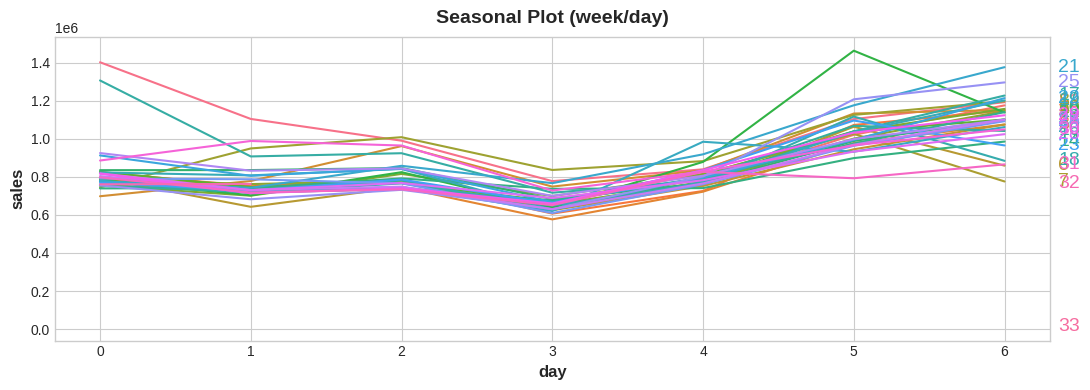

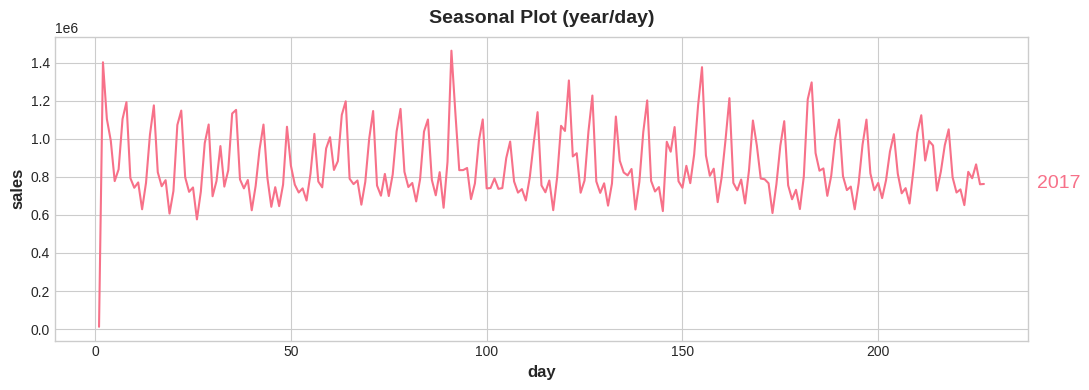

In [ ]:
X_seasonality = average_sales
X_seasonality["week"] = X_seasonality.index.week
X_seasonality["day"] = X_seasonality.index.dayofweek
X_seasonality["year"] = X_seasonality.index.year
seasonal_plot(X_seasonality, y='sales', period='week', freq='day');
X_seasonality["day"] = X_seasonality.index.dayofyear
seasonal_plot(X_seasonality, y="sales", period="year", freq="day");

On an average, More sales are on day 5,6 and 0. \\
Also, sales increases yearly

In [ ]:
average_sales

,sales,Time,Lag_1,week,day,year
date,,,,,,
2017-01-01,1.208250e+04,1457,1.109013e+06,52,1,2017
2017-01-02,1.402306e+06,1458,1.208250e+04,1,2,2017
2017-01-03,1.104377e+06,1459,1.402306e+06,1,3,2017
2017-01-04,9.900934e+05,1460,1.104377e+06,1,4,2017
2017-01-05,7.776209e+05,1461,9.900934e+05,1,5,2017
...,...,...,...,...,...,...
2017-08-11,8.263738e+05,1679,6.513869e+05,32,223,2017
2017-08-12,7.926306e+05,1680,8.263738e+05,32,224,2017
2017-08-13,8.656397e+05,1681,7.926306e+05,32,225,2017


In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="M", order=4)  # 4 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=average_sales.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X_fourier = dp.in_sample()

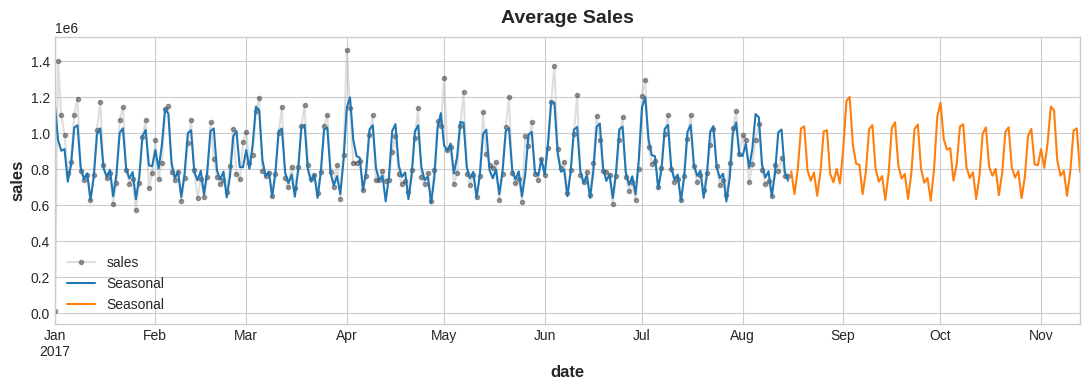

In [ ]:
y_fourier=average_sales['sales'].copy()
model_f = LinearRegression().fit(X_fourier, y_fourier)
y_pred_f = pd.Series(
    model_f.predict(X_fourier),
    index=X_fourier.index,
    name='Fitted',
)

X_fore_f = dp.out_of_sample(steps=90)
y_fore_f = pd.Series(model_f.predict(X_fore_f), index=X_fore_f.index)

#y_pred_f = pd.Series(model_f.predict(X_fourier), index=X_fourier.index)
ax = y_fourier.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="sales")
ax = y_pred_f.plot(ax=ax, label="Seasonal")
ax = y_fore_f.plot(ax=ax, label="Seasonal")

ax.legend();

Very bad prediction

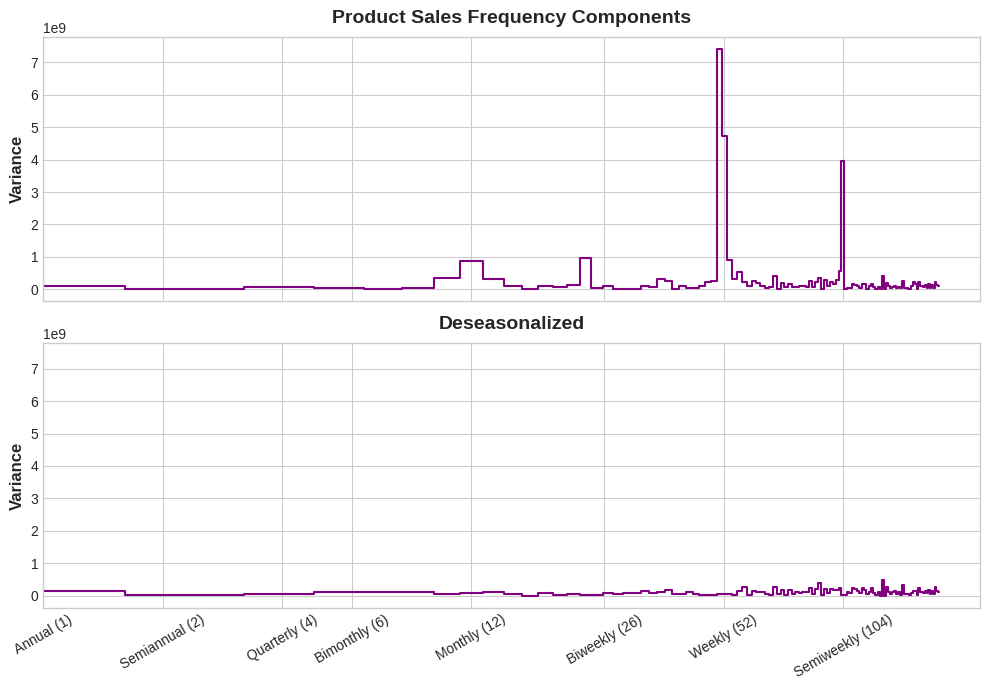

In [ ]:
y_deseason = y_fourier - y_pred_f
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))
ax1 = plot_periodogram(y_fourier, ax=ax1)
ax1.set_title("Product Sales Frequency Components")
ax2 = plot_periodogram(y_deseason, ax=ax2);
ax2.set_title("Deseasonalized");

Model works well on a particular year. But if we take entire data set, it fails. WHY??

In [ ]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
df_holidays['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [ ]:
holidays_events = pd.read_csv(
    "holidays_events.csv",
    dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
holidays_events = holidays_events.set_index('date').to_period('D')


<ipython-input-63-6e9d7d4f4060>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  holidays_events = pd.read_csv(


Below, If I include local holidays also, I get 231 entries, but y_fourier has 227 entries. I tried but coludn't merge it. Help!!!

In [ ]:
holidays = (
    holidays_events
    .query("locale in ['National', 'Regional']")
    .loc['2017':'2017-08-15', ['description']]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())
)

display(holidays)

,description
date,
2017-01-01,Primer dia del ano
2017-01-02,Traslado Primer dia del ano
2017-02-27,Carnaval
2017-02-28,Carnaval
2017-04-01,Provincializacion de Cotopaxi
2017-04-14,Viernes Santo
2017-05-01,Dia del Trabajo
2017-05-13,Dia de la Madre-1
2017-05-14,Dia de la Madre


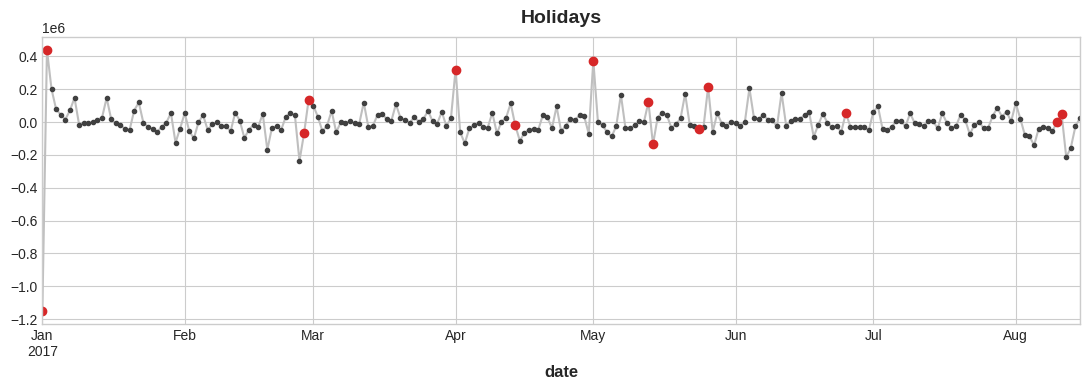

In [ ]:
ax = y_deseason.plot(**plot_params)
plt.plot_date(holidays.index, y_deseason[holidays.index], color='C3')
ax.set_title('Holidays');

In [ ]:
X_holidays = pd.get_dummies(holidays)

X_fou_holi = X_fourier.join(X_holidays, on='date').fillna(0.0)
X_fou_holi.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 227 entries, 2017-01-01 to 2017-08-15
Freq: D
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   const                                               227 non-null    float64
 1   trend                                               227 non-null    float64
 2   s(2,7)                                              227 non-null    float64
 3   s(3,7)                                              227 non-null    float64
 4   s(4,7)                                              227 non-null    float64
 5   s(5,7)                                              227 non-null    float64
 6   s(6,7)                                              227 non-null    float64
 7   s(7,7)                                              227 non-null    float64
 8   sin(1,freq=M)                                       227

In [ ]:
y_fourier=average_sales['sales'].copy()

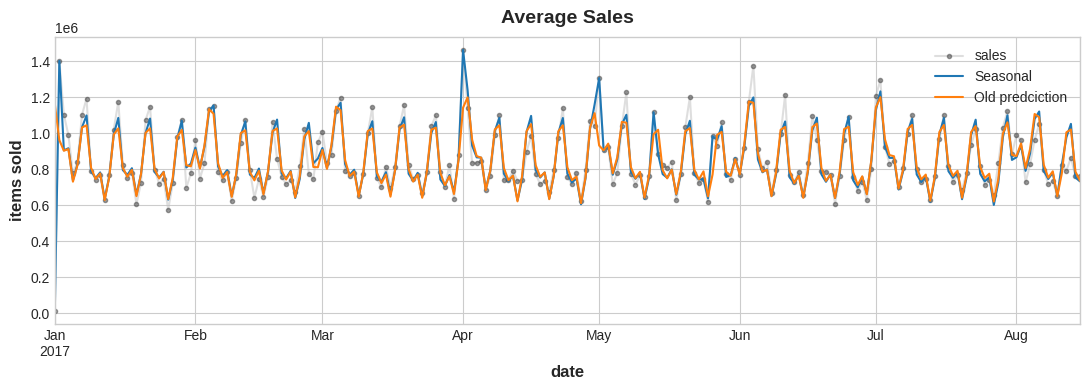

In [ ]:

model = LinearRegression().fit(X_fou_holi, y_fourier)
y_pred = pd.Series(
    model.predict(X_fou_holi),
    index=X_fou_holi.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X_fou_holi), index=X_fou_holi.index)
ax = y_fourier.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax=y_pred_f.plot(ax=ax,label="Old predciction")
ax.legend();

See the difference between blue and orange

Huh, Lot's of analysis in seasonality

#Cycles

In [ ]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#Hybrid

In [ ]:
df_train_hybrid=pd.read_csv(
    'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_train_hybrid['date'] = df_train_hybrid.date.dt.to_period('D')
df_train_hybrid = df_train_hybrid.set_index(['store_nbr', 'family', 'date']).sort_index()

<ipython-input-85-2dd4c92b91f0>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_train_hybrid=pd.read_csv(


In [ ]:
family_sales = (
    df_train_hybrid
    .groupby(['family', 'date'])
    .sum()
    .unstack('family') #made rows to columns
    #And this all comes under column sales only
    .loc['2017']
)
family_sales.head()

sales                                                 \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS  BREAD/BAKERY   
date                                                                   
2017-01-01        5.0       2.0    3.0    4008.0   0.0    490.572998   
2017-01-02      620.0      14.0  629.0  335235.0  26.0  45621.160156   
2017-01-03      448.0      16.0  388.0  243422.0  44.0  35916.703125   
2017-01-04      369.0      18.0  372.0  211239.0  41.0  32084.673828   
2017-01-05      342.0      19.0  320.0  175975.0  22.0  26757.626953   

                                                         ... onpromotion  \
family     CELEBRATION  CLEANING    DAIRY          DELI  ...   MAGAZINES   
date                                                     ...               
2017-01-01         7.0     405.0    622.0    195.975006  ...           0   
2017-01-02       767.0  120617.0  83430.0  29112.201172  ...           0   
2017-01-03       574.0   92443.0  65027.0  21832.203125  ...           0   
2017-01-04       604.0   81434.0  59821.0  16707.474609  ...           0   
2017-01-05       672.0   67059.0  44781.0  14081.930664  ...           0   

                                                                             \
family     MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS POULTRY   
date                                                                          
2017-01-01     1             6            1                       0       0   
2017-01-02    25           572           29                       0      14   
2017-01-03    26           525           24                       0      21   
2017-01-04    20           650           24                       0      16   
2017-01-05   485           306            0                       0      16   

                                                                      
family     PREPARED FOODS PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                  
2017-01-01              2       7                          0       0  
2017-01-02             63     304                          0      22  
2017-01-03             73    3040                          0      22  
2017-01-04            294    5469                          0      18  
2017-01-05             49     271                          0      24  

[5 rows x 66 columns]

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None

def fit(self, X_1, X_2, y):
    # YOUR CODE HERE: fit self.model_1
    self.model_1.fit(X_1,y)

    y_fit = pd.DataFrame(
        # YOUR CODE HERE: make predictions with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=y.columns,
    )

    # YOUR CODE HERE: compute residuals
    y_resid = y-y_fit
    y_resid = y_resid.stack().squeeze() # wide to long

    # YOUR CODE HERE: fit self.model_2 on residuals
    self.model_2.fit(X_2, y_resid)

    # Save column names for predict method
    self.y_columns = y.columns
    # Save data for question checking
    self.y_fit = y_fit
    self.y_resid = y_resid


# Add method to class
BoostedHybrid.fit = fit

def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        # YOUR CODE HERE: predict with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=self.y_columns,
    )
    y_pred = y_pred.stack().squeeze()  # wide to long

    # YOUR CODE HERE: add self.model_2 predictions to y_pred
    y_pred += self.model_2.predict(X_2)

    return y_pred.unstack()  # long to wide


# Add method to class
BoostedHybrid.predict = predict

In [ ]:
y = family_sales.loc[:, 'sales']
y.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,5.0,2.0,3.0,4008.0,0.0,490.572998,7.0,405.0,622.0,195.975006,...,4.0,270.710999,142.0,4.0,12.0,154.199005,56.198997,1682.843994,0.0,14.000000
2017-01-02,620.0,14.0,629.0,335235.0,26.0,45621.160156,767.0,120617.0,83430.0,29112.201172,...,420.0,26380.205078,38576.0,692.0,1230.0,31396.308594,8291.999023,184113.031250,158.0,1813.425049
2017-01-03,448.0,16.0,388.0,243422.0,44.0,35916.703125,574.0,92443.0,65027.0,21832.203125,...,189.0,23086.128906,26370.0,479.0,732.0,24948.738281,6794.309082,183306.218750,109.0,1465.303955
2017-01-04,369.0,18.0,372.0,211239.0,41.0,32084.673828,604.0,81434.0,59821.0,16707.474609,...,189.0,19932.560547,23035.0,439.0,653.0,23288.925781,6304.003906,187242.187500,93.0,1189.843018
2017-01-05,342.0,19.0,320.0,175975.0,22.0,26757.626953,672.0,67059.0,44781.0,14081.930664,...,173.0,19923.066406,19490.0,412.0,558.0,18666.369141,5477.466797,111743.093750,77.0,1113.228027


In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

In [ ]:
X_2 = family_sales.drop('sales', axis=1).stack()
#stack used to convert columns to rows
X_2

onpromotion
date       family                                 
2017-01-01 AUTOMOTIVE                            0
           BABY CARE                             0
           BEAUTY                                0
           BEVERAGES                            38
           BOOKS                                 0
...                                            ...
2017-08-15 POULTRY                               6
           PREPARED FOODS                        9
           PRODUCE                            3169
           SCHOOL AND OFFICE SUPPLIES          148
           SEAFOOD                               0

[7491 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #convert categorical labels into numeric labels.
X_2 = X_2.reset_index('family')
X_2['family'] = le.fit_transform(X_2['family'])

# Label encoding for seasonality
X_2["day"] = X_2.index.day
X_2

,family,onpromotion,day
date,,,
2017-01-01,0,0,1
2017-01-01,1,0,1
2017-01-01,2,0,1
2017-01-01,3,38,1
2017-01-01,4,0,1
...,...,...,...
2017-08-15,28,6,15
2017-08-15,29,9,15
2017-08-15,30,3169,15


In [ ]:
from xgboost import XGBRegressor
model = BoostedHybrid(LinearRegression(),XGBRegressor())

# YOUR CODE HERE: Fit and predict
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1,X_2)

y_pred = y_pred.clip(0.0)

<ipython-input-105-119b0158bc34>:16: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  _ = y_fit.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C0', ax=axs)
<ipython-input-105-119b0158bc34>:17: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  _ = y_pred.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C3', ax=axs)


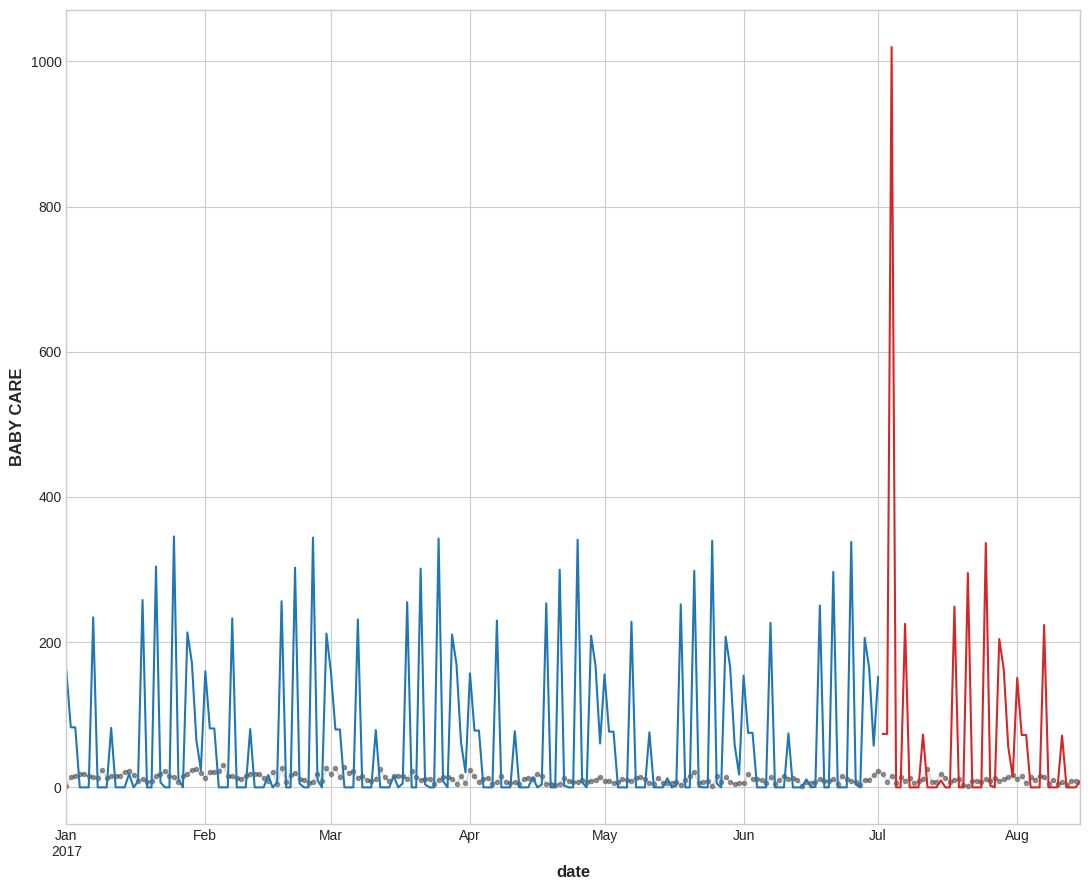

In [ ]:
y_train, y_valid = y[:"2017-07-01"], y["2017-07-02":]
X1_train, X1_valid = X_1[: "2017-07-01"], X_1["2017-07-02" :]
X2_train, X2_valid = X_2.loc[:"2017-07-01"], X_2.loc["2017-07-02":]

# Some of the algorithms above do best with certain kinds of
# preprocessing on the features (like standardization), but this is
# just a demo.
model.fit(X1_train, X2_train, y_train)
y_fit = model.predict(X1_train, X2_train).clip(0.0)
y_pred = model.predict(X1_valid, X2_valid).clip(0.0)

families = y.columns[1:2]
axs = y.loc(axis=1)[families].plot(
    subplots=True, sharex=True, figsize=(11, 9), **plot_params, alpha=0.5,
)
_ = y_fit.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C0', ax=axs)
_ = y_pred.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C3', ax=axs)
for ax, family in zip(axs, families):
    ax.legend([])
    ax.set_ylabel(family)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

# Model 2
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Boosted Hybrid

# YOUR CODE HERE: Try different combinations of the algorithms above
model = BoostedHybrid(
    model_1=LinearRegression(),
    model_2=KNeighborsRegressor(),
)

<ipython-input-100-e35fad742c78>:16: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  _ = y_fit.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C0', ax=axs)
<ipython-input-100-e35fad742c78>:17: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  _ = y_pred.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C3', ax=axs)


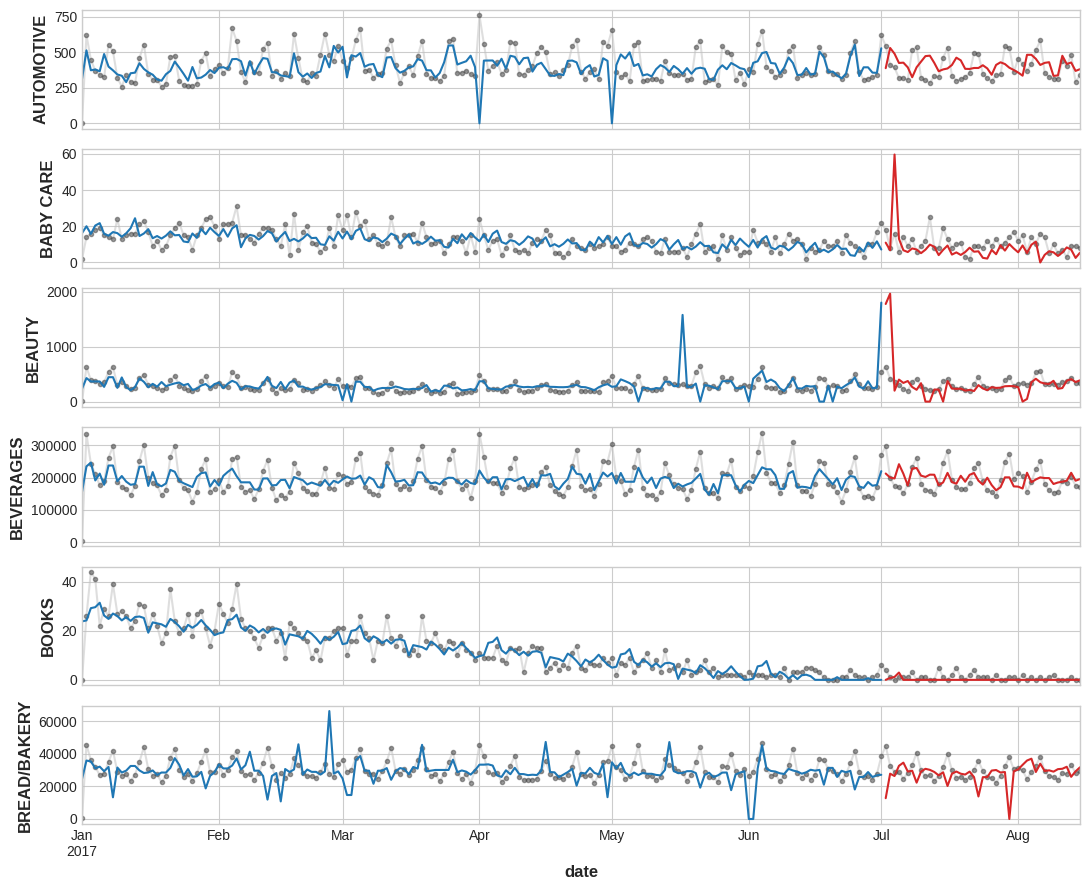

In [ ]:
y_train, y_valid = y[:"2017-07-01"], y["2017-07-02":]
X1_train, X1_valid = X_1[: "2017-07-01"], X_1["2017-07-02" :]
X2_train, X2_valid = X_2.loc[:"2017-07-01"], X_2.loc["2017-07-02":]

# Some of the algorithms above do best with certain kinds of
# preprocessing on the features (like standardization), but this is
# just a demo.
model.fit(X1_train, X2_train, y_train)
y_fit = model.predict(X1_train, X2_train).clip(0.0)
y_pred = model.predict(X1_valid, X2_valid).clip(0.0)

families = y.columns[0:6]
axs = y.loc(axis=1)[families].plot(
    subplots=True, sharex=True, figsize=(11, 9), **plot_params, alpha=0.5,
)
_ = y_fit.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C0', ax=axs)
_ = y_pred.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C3', ax=axs)
for ax, family in zip(axs, families):
    ax.legend([])
    ax.set_ylabel(family)

In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

Few families are giving very bad predictions. So Im checking correlation of onpromotion with sales for these 3

In [ ]:
family_sales

sales                                                 \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS  BREAD/BAKERY   
date                                                                   
2017-01-01        5.0       2.0    3.0    4008.0   0.0    490.572998   
2017-01-02      620.0      14.0  629.0  335235.0  26.0  45621.160156   
2017-01-03      448.0      16.0  388.0  243422.0  44.0  35916.703125   
2017-01-04      369.0      18.0  372.0  211239.0  41.0  32084.673828   
2017-01-05      342.0      19.0  320.0  175975.0  22.0  26757.626953   
...               ...       ...    ...       ...   ...           ...   
2017-08-11      441.0       7.0  351.0  189111.0   0.0  28204.486328   
2017-08-12      403.0       3.0  369.0  182318.0   0.0  27403.548828   
2017-08-13      481.0       9.0  433.0  202354.0   1.0  33262.757812   
2017-08-14      292.0       9.0  337.0  174832.0   0.0  28002.457031   
2017-08-15      337.0       8.0  339.0  170773.0   0.0  29158.195312   

                                                         ... onpromotion  \
family     CELEBRATION  CLEANING    DAIRY          DELI  ...   MAGAZINES   
date                                                     ...               
2017-01-01         7.0     405.0    622.0    195.975006  ...           0   
2017-01-02       767.0  120617.0  83430.0  29112.201172  ...           0   
2017-01-03       574.0   92443.0  65027.0  21832.203125  ...           0   
2017-01-04       604.0   81434.0  59821.0  16707.474609  ...           0   
2017-01-05       672.0   67059.0  44781.0  14081.930664  ...           0   
...                ...       ...      ...           ...  ...         ...   
2017-08-11       870.0   55682.0  44909.0  18680.488281  ...           0   
2017-08-12       849.0   57935.0  42854.0  15689.892578  ...           0   
2017-08-13       544.0   61757.0  50112.0  17593.273438  ...           0   
2017-08-14       594.0   55032.0  43050.0  14662.741211  ...           0   
2017-08-15       597.0   58474.0  40707.0  14935.453125  ...           0   

                                                                             \
family     MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS POULTRY   
date                                                                          
2017-01-01     1             6            1                       0       0   
2017-01-02    25           572           29                       0      14   
2017-01-03    26           525           24                       0      21   
2017-01-04    20           650           24                       0      16   
2017-01-05   485           306            0                       0      16   
...          ...           ...          ...                     ...     ...   
2017-08-11  1238           486            0                       0    1480   
2017-08-12     0           470            0                       1       6   
2017-08-13     0           499            0                       0      10   
2017-08-14     0           471            0                       0       7   
2017-08-15     0           476            0                       5       6   

                                                                      
family     PREPARED FOODS PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                  
2017-01-01              2       7                          0       0  
2017-01-02             63     304                          0      22  
2017-01-03             73    3040                          0      22  
2017-01-04            294    5469                          0      18  
2017-01-05             49     271                          0      24  
...                   ...     ...                        ...     ...  
2017-08-11             29     324                        144     137  
2017-08-12             15     324                        149      41  
2017-08-13             12     319                     

In [ ]:
y_extra = y['BABY CARE']
y_extra

date
2017-01-01     2.0
2017-01-02    14.0
2017-01-03    16.0
2017-01-04    18.0
2017-01-05    19.0
              ... 
2017-08-11     7.0
2017-08-12     3.0
2017-08-13     9.0
2017-08-14     9.0
2017-08-15     8.0
Freq: D, Name: BABY CARE, Length: 227, dtype: float32

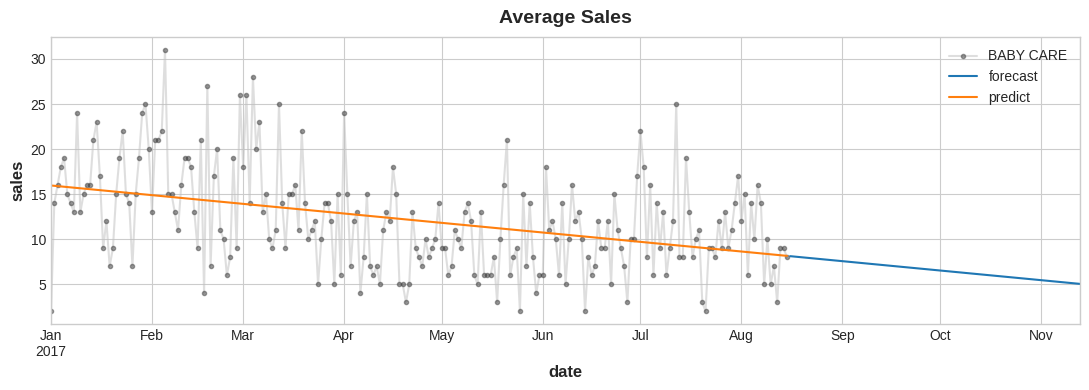

In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

model = LinearRegression().fit(X_1, y_extra)
y_pred = pd.Series(
    model.predict(X_1),
    index=X_1.index,
    name='Fitted',
)

X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

#y_pred_f = pd.Series(model_f.predict(X_fourier), index=X_fourier.index)
ax = y_extra.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="sales")
ax = y_fore.plot(ax=ax, label="forecast")

ax = y_pred.plot(ax=ax, label="predict")

ax.legend();

In [ ]:
X_3 = family_sales.loc[:, 'onpromotion']
#stack used to convert columns to rows
X_3=X_3["BABY CARE"]
X_3

date
2017-01-01    0
2017-01-02    0
2017-01-03    0
2017-01-04    0
2017-01-05    1
             ..
2017-08-11    0
2017-08-12    0
2017-08-13    0
2017-08-14    0
2017-08-15    0
Freq: D, Name: BABY CARE, Length: 227, dtype: int64

In [ ]:
y_resid = y_extra-y_pred
y_resid

date
2017-01-01   -13.961512
2017-01-02    -1.926961
2017-01-03     0.107590
2017-01-04     2.142141
2017-01-05     3.176692
                ...    
2017-08-11    -1.291229
2017-08-12    -5.256678
2017-08-13     0.777873
2017-08-14     0.812423
2017-08-15    -0.153026
Freq: D, Length: 227, dtype: float64

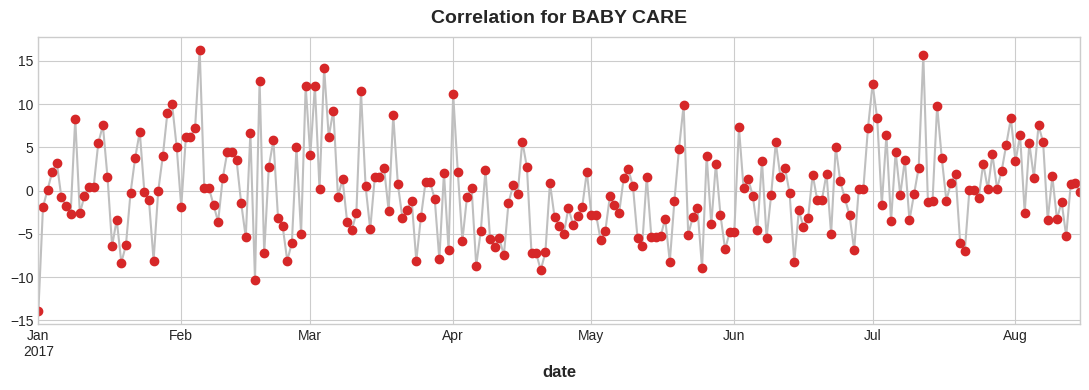

In [ ]:
ax = y_resid.plot(**plot_params)
plt.plot_date(X_3.index, y_resid[X_3.index], color='C3')
ax.set_title('Correlation for BABY CARE');

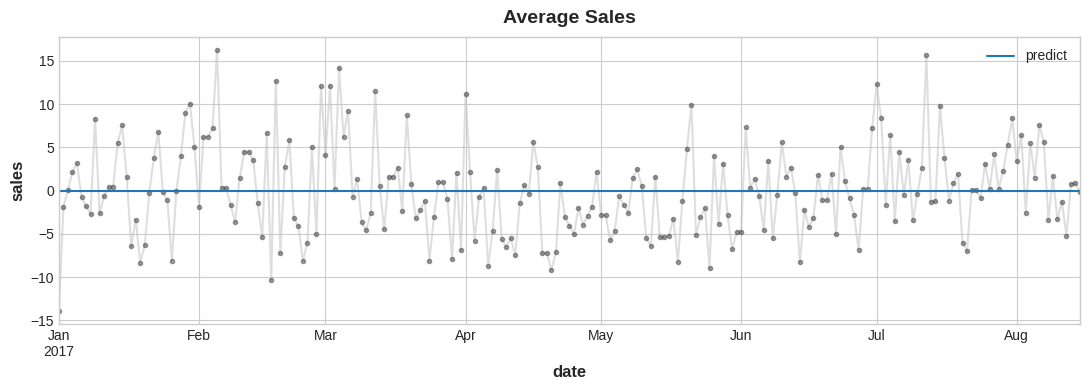

In [ ]:
model = LinearRegression().fit(X_1, y_resid)
y_pred_1 = pd.Series(
    model.predict(X_1),
    index=X_1.index,
    name='Fitted',
)

# X_fore = dp.out_of_sample(steps=90)
# y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

#y_pred_f = pd.Series(model_f.predict(X_fourier), index=X_fourier.index)
ax = y_resid.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="sales")
#ax = y_fore.plot(ax=ax, label="forecast")

ax = y_pred_1.plot(ax=ax, label="predict")

ax.legend();

In [ ]:
y_pred_1

date
2017-01-01    1.705489e-15
2017-01-02    1.700091e-15
2017-01-03    1.694693e-15
2017-01-04    1.689296e-15
2017-01-05    1.683898e-15
                  ...     
2017-08-11    5.072028e-16
2017-08-12    5.018051e-16
2017-08-13    4.964075e-16
2017-08-14    4.910098e-16
2017-08-15    4.856121e-16
Freq: D, Name: Fitted, Length: 227, dtype: float64

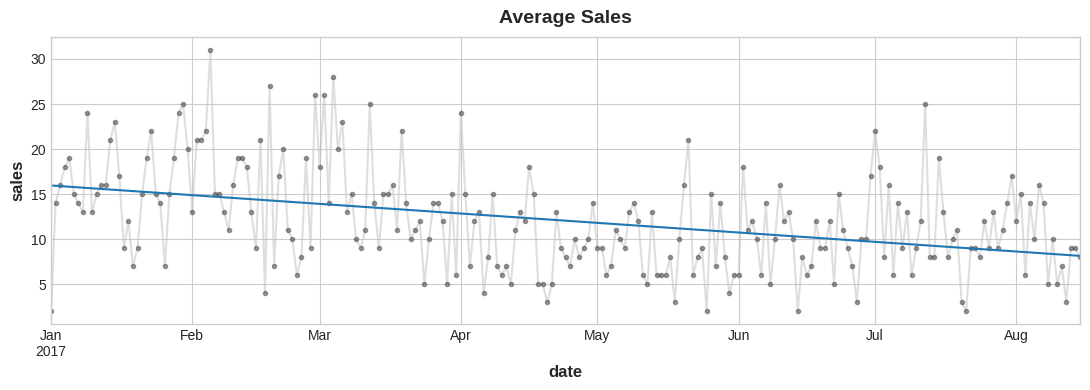

In [ ]:
y=y_pred+y_pred_1
ax = y_extra.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="sales")
#ax = y_fore.plot(ax=ax, label="forecast")

ax = y.plot(ax=ax, label="predict")

In [ ]:
y_resid_2=y_extra-y
y_resid

date
2017-01-01   -13.961512
2017-01-02    -1.926961
2017-01-03     0.107590
2017-01-04     2.142141
2017-01-05     3.176692
                ...    
2017-08-11    -1.291229
2017-08-12    -5.256678
2017-08-13     0.777873
2017-08-14     0.812423
2017-08-15    -0.153026
Freq: D, Length: 227, dtype: float64